# **Algoritmo genetico**

## *Paso 1:*

Definir El tamaño de la poblacion $N = 4$ \
Definir un rango de busquedad o individuos $x \in [-5.0, 5.0]$ \
Definir un alpha inicial $\alpha = [0, 1]$ para la recombinacion aritmetica. El valor $\alpha$ tomara valores aleatorios entre 0 y 1, como inicial se utilizara $\alpha = 0.5$

In [597]:
import  numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 5, 4000)

x = [-4.0, 2.5, -1.0, 3.2]
alpha = 0.5

print("Poblacion inicial (xi):", x)


Poblacion inicial (xi): [-4.0, 2.5, -1.0, 3.2]


## *Paso 2:*
Se realiza una evaluacion en la funcion con el valor de cada individuo.

con la funcion: $f(x)=2+x^2$

Evaluacion de la poblacion f(xi) [18.0, 8.25, 3.0, 12.240000000000002]
El mejor punto es: -1.0 dado f(x)= 3.0


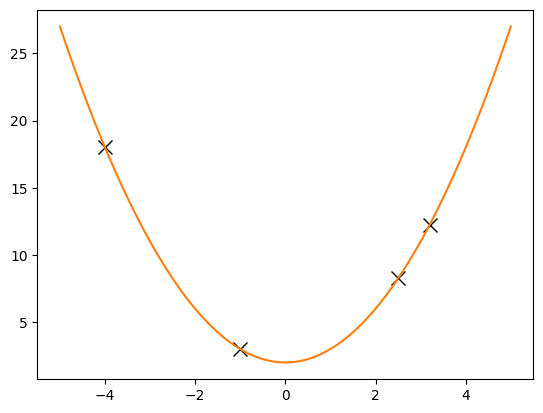

In [598]:
def f(x):
  return 2+(x**2)

Evaluaciones = list(f(i) for i in x)
print("Evaluacion de la poblacion f(xi)",Evaluaciones)

Eva_mejor = min(Evaluaciones)
x_mejor = x[Evaluaciones.index(Eva_mejor)]
print("El mejor punto es:", x_mejor,"dado f(x)=", Eva_mejor)

plt.plot(x, Evaluaciones,marker='x', markersize=10,linestyle='none', markerfacecolor='red', markeredgecolor='black')
plt.plot(X, f(X))

## *Paso 3*

Se realiza una seleccion de individuos segun su aptitud\
$aptitud= \frac{1}{1+f(x)}$

Fitness: [0.05263157894736842, 0.10810810810810811, 0.25, 0.07552870090634439]


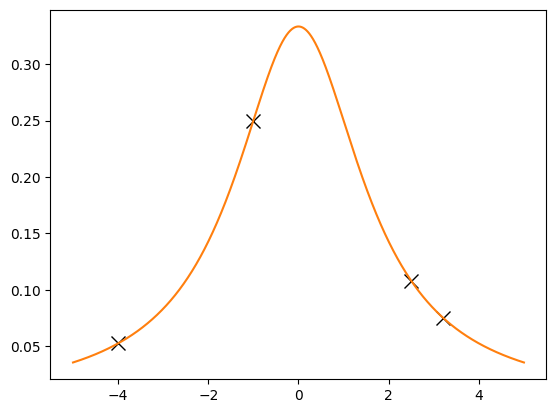

In [599]:
def aptitud(fx):
  return 1/(1+fx)

A = list(aptitud(f(i)) for i in x)
print("Fitness:",A)

plt.plot(x, A, marker='x', markersize=10,linestyle='none', markerfacecolor='red', markeredgecolor='black')
plt.plot(X, aptitud(f(X)))


## *Paso 4*

Buscar probabilidades segun el fitness de cada invididuo segun la ecuacion:\

$p_i=\frac{A_i}{S}$

In [600]:
S = sum(A)
print("Fitness:",S)
probabilidades = list(Ai/S for Ai in A)
print("Pobabilidades de seleccion:",probabilidades)

prob_mejor = max(probabilidades)
x_prob_mejor = x[probabilidades.index(prob_mejor)]

print("La mejor probabilidad de reproduccion es de:", prob_mejor, "dado por:", x_prob_mejor)

Fitness: 0.4862683879618209
Pobabilidades de seleccion: [0.1082356580241049, 0.2223218921576209, 0.5141193756144983, 0.1553230742037759]
La mejor probabilidad de reproduccion es de: 0.5141193756144983 dado por: -1.0


## Paso 5

Se realiza el emparejamiento, utilizando al individuo con la mejor probabilidad y se seleccionan otros 2 individuos al azar para tener "hijos"

In [601]:
Best = x.pop(probabilidades.index(prob_mejor))
#pareja1 = x.pop(np.random.randint(0, len(x)))
#pareja2 = x.pop(np.random.randint(0, len(x)))

pareja1 = 2.5
pareja2 = 3.2

print("El mejor X",Best)
print("Pareja 1:",pareja1)
print("Pajera 2", pareja2)

El mejor X -1.0
Pareja 1: 2.5
Pajera 2 3.2


# *Paso 6*

Para que los individuos tengan hijos se utiliza el **cruce aritmetico**, donde:

$h_1= \alpha x_{best}+(1-\alpha) x_{seleccionado1}$\
$h_2= (1-\alpha)x_{best}+\alpha x_{seleccionado2}$

In [602]:
def hijo1(mejor, aleatorio):
  return alpha*mejor + (1-alpha)*aleatorio

def hijo2(mejor, aleatorio):
  return (1-alpha)*mejor + alpha*aleatorio

hijos = [hijo1(Best,pareja1),hijo2(Best,pareja1),hijo1(Best,pareja2),hijo2(Best,pareja2)]

print("hijo 1 de la pareja Best y aleatorio1 ",hijos[0])
print("hijo 2 de la pareja Best y aleatorio1 ",hijos[1])
print("hijo 1 de la pareja Best y aleatorio2 ",hijos[2])
print("hijo 2 de la pareja Best y aleatorio2 ",hijos[3])

hijo 1 de la pareja Best y aleatorio1  0.75
hijo 2 de la pareja Best y aleatorio1  0.75
hijo 1 de la pareja Best y aleatorio2  1.1
hijo 2 de la pareja Best y aleatorio2  1.1


# *Paso 7*

Se realiza mutacion de los individuos con la mutacion Gaussiana\

$x' = x+ \sigma N(0,1)$

donde $\sigma$ es una escala de mutacion y $N(0,1)$ un numero al azar que genera ruido

Nueva poblacion [0.920568314168541, 0.9021988900436444, 1.245143955918097, 1.2333551653019243]
[2.84744602105111, 2.8139628371959837, 3.550383470959368, 3.521164963776937]


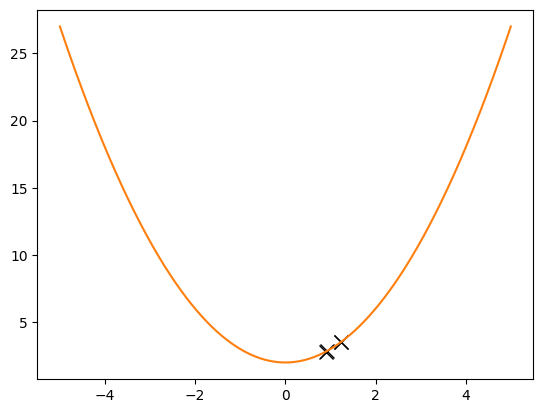

In [603]:
def mutacion(hijo):
  return hijo+(0.2*(np.random.rand()))

poblacion = list(mutacion(i) for i in hijos)
print("Nueva poblacion",poblacion)

eval_nu_pobla = list(f(i) for i in poblacion)
print(eval_nu_pobla)

plt.plot(poblacion, eval_nu_pobla,marker='x', markersize=10,linestyle='none', markerfacecolor='red', markeredgecolor='black')
plt.plot(X, f(X))

## *Paso 8*

El punto mas alto (el peor) debera ser reemplazado con el punto $x_{best}$ al cual se le conoce como elitista, lo que garantiza que el punto solo mejore.

El punto: 1.245143955918097 Se reemplazo por: -1.0
[0.920568314168541, 0.9021988900436444, -1.0, 1.2333551653019243]


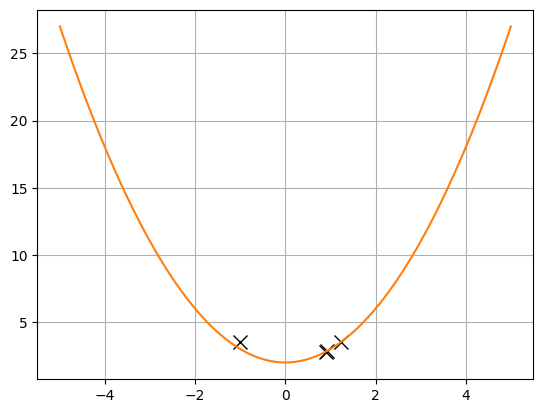

In [604]:
fx_peor = max(eval_nu_pobla)
index_malo = eval_nu_pobla.index(fx_peor)
x_peor = poblacion[index_malo]
poblacion[index_malo] = Best

print("El punto:",x_peor, "Se reemplazo por:", poblacion[index_malo])

print(poblacion)
plt.plot(poblacion, eval_nu_pobla,marker='x', markersize=10,linestyle='none', markerfacecolor='red', markeredgecolor='black')
plt.plot(X, f(X))
plt.grid(True)
plt.show()